In [1]:
import numpy as np
import torch
import pycbc
from scipy import signal
import os
import gzip
import pickle
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt

import gc
gc.collect()

9

In [2]:
def id_2_path_wave(idx, input_dir=".", train=True) -> str:
    if train:
        return "{}/train/{}/{}/{}/{}.npy".format(input_dir, idx[0], idx[1], idx[2], idx)
    else:
        return "{}/test/{}/{}/{}/{}.npy".format(input_dir, idx[0], idx[1], idx[2], idx)
    
specs = []
df = pd.read_csv('../../../data/g2net-gravitational-wave-detection/training_labels.csv').set_index('id')
df['path'] = df['id'].apply(lambda x: id_2_path_wave(x, '../../../data/g2net-gravitational-wave-detection/', True))
window = torch.FloatTensor(signal.windows.tukey(4096+2*2048,0.5))
path0 = df.query("target==0").path
for i, path in enumerate(path0):    
    spec = []
    c = torch.FloatTensor(np.load(path).astype(np.float32))
    c = torch.cat([-c.flip(-1)[:,4096-2049:-1]+2*c[:,0].unsqueeze(-1),c,
                               -c.flip(-1)[:,1:2049]+2*c[:,-1].unsqueeze(-1)],1)
    spec.append(torch.fft.fft((1e20*c*window).cuda()).abs().cpu())    
s = torch.stack(spec,0)
torch.save(s.mean(0),'../../../data/1D_Model/avr_w0.pth')

  0%|          | 0/35160 [00:00<?, ?it/s]

  0%|          | 0/35286 [00:00<?, ?it/s]

  0%|          | 0/34839 [00:00<?, ?it/s]

  0%|          | 0/35175 [00:00<?, ?it/s]

  0%|          | 0/34753 [00:00<?, ?it/s]

  0%|          | 0/34525 [00:00<?, ?it/s]

  0%|          | 0/34813 [00:00<?, ?it/s]

  0%|          | 0/34969 [00:00<?, ?it/s]

  0%|          | 0/34996 [00:00<?, ?it/s]

  0%|          | 0/35202 [00:00<?, ?it/s]

  0%|          | 0/35034 [00:00<?, ?it/s]

  0%|          | 0/34723 [00:00<?, ?it/s]

  0%|          | 0/34981 [00:00<?, ?it/s]

  0%|          | 0/35299 [00:00<?, ?it/s]

  0%|          | 0/35235 [00:00<?, ?it/s]

  0%|          | 0/35010 [00:00<?, ?it/s]

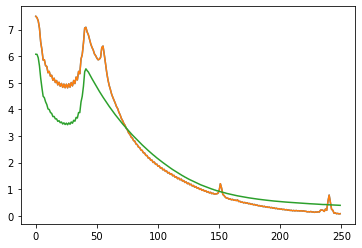

In [3]:
plt.plot(s[:,0].mean(0).log().numpy()[:250])
plt.plot(s[:,1].mean(0).log().numpy()[:250])
plt.plot(s[:,2].mean(0).log().numpy()[:250])
plt.show()